#Importing required libraries and frameworks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import validation_curve


# Loading the Property Data

In [3]:
data = pd.read_csv('Data.csv')
data.dropna(inplace = True)

data.shape

(13055, 16)

In [4]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)

location_stats.head(20)

location
DHA Defence           1406
G-13                   998
Bahria Town            853
Ghauri Town            613
G-11                   613
E-11                   596
G-15                   519
I-8                    443
Gulberg                415
Soan Garden            385
F-11                   382
B-17                   364
I-10                   330
H-13                   329
CBR Town               262
D-12                   255
Bani Gala              253
G-9                    245
PWD Housing Scheme     219
G-10                   215
Name: location, dtype: int64

##Some Graphs to better understand the data

Graph of Latitude against Longitutde helps us roughly visualize the locations of houses in data

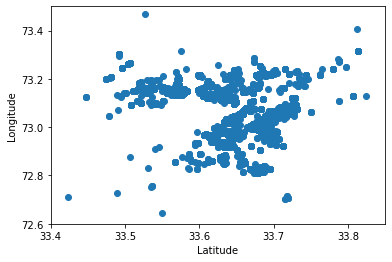

In [5]:
plt.scatter(x=data['latitude'], y=data['longitude'])
plt.ylim(ymin=72.6,ymax=73.5)
plt.xlim(xmin=33.4,xmax=33.85)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

The following graph shows a bar graph of most common locations in our data

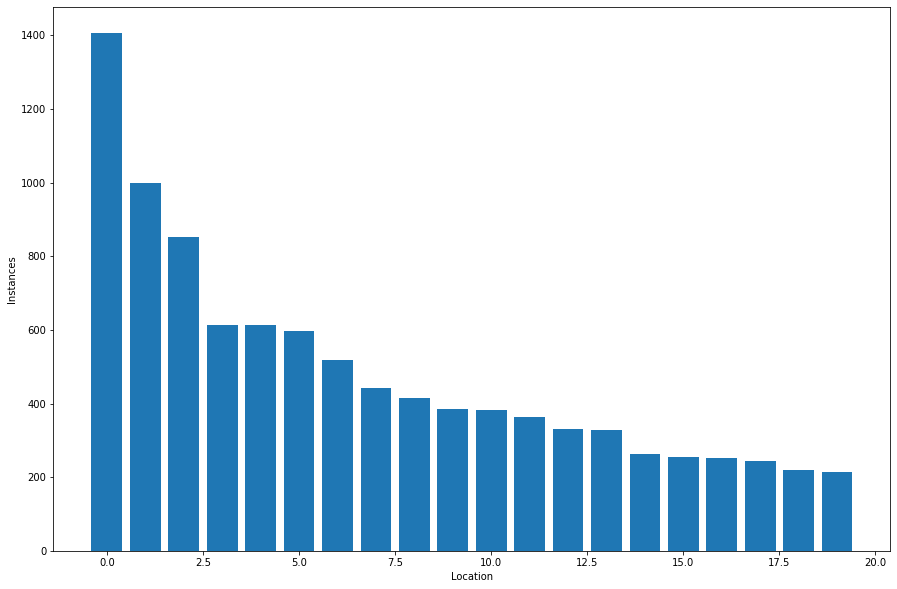

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
array = list(range(0,20))
plt.bar(array,location_stats[:20])
plt.xlabel("Location")
plt.ylabel("Instances")
plt.show()

#Data Processing

In [7]:
# Dropping all the unnecessary columns from the table
data = data.drop(['property_id', 'location_id','page_url', 'city', 'latitude', 'longitude', 'area', 'purpose', 'Area Type', 'Area Category'], axis = 1)
data.head()

,property_type,price,location,baths,bedrooms,Area Size
0,Flat,10000000.0,G-10,2.0,2.0,4.0
1,Flat,6900000.0,E-11,3.0,3.0,5.6
2,House,16500000.0,G-15,6.0,5.0,8.0
4,House,7000000.0,DHA Defence,3.0,3.0,8.0
7,Flat,7800000.0,E-11,2.0,2.0,6.2


*What we can Observe?*

---


As we can see from the structure of data. There are 5 features which we will use for training our model and predict the expected price of the house.



*   The following code cell checks and see which locations have less than or equal to 10 instances. Then it assigns them a new value which is 'others'. This helps us merge houses from areas which we do not have enough data for.




In [8]:
locations_less_than_10 = location_stats[location_stats <= 10]
data['location'] = data['location'].apply(lambda x:'others' if x in locations_less_than_10 else x)




*   We then drop the rows which have location=='others'

*   This does reduce some testing size however, we now have cleaner data with less outliers.







In [9]:
data.drop(data[data['location'] =='others'].index, inplace = True)

data.shape

(12685, 6)

In [10]:
# Printing shape before 1 hot encoding
data.shape

(12685, 6)





*   Next code cell helps change the string values into numbers


*   This makes new columns that are the same as the number of unique values of strings.
*   This then assigns 1 or 0 to the appropriate column.
*   This changes the strings in columns: **"property_type"** and **"location"**.


> For Example:


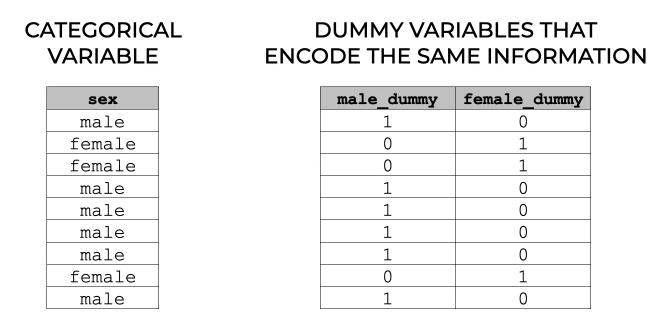








In [ ]:
  data  = pd.get_dummies(data=data, drop_first=True)
labels = data['price']
data = data.drop('price', axis=1)




*   We can notice that training parameters increase from 6 to 94
*   This however does not bring up computational cost much as all columns are one hot encoded and the increase in accuracy is substantial.



In [ ]:
# Printing shape after one hot encoding
data.shape

(12685, 94)

# The Model


---



> *Decision Tree Regressor*

We used Decision Tree Regressor for this problem. This model performed better than normal regression. Using neural networks and tuning it accordingly would have given us better accuracy however the computational cost increases if we follow that approach. In our opinion Decision Tree provides the perfect mix between **high accuracy** and **low costs**.



> *Linear Regression*

Linear Regression is a less costly algorithm and as we will see later in the notebook it performs quite well. We have implemented Linear Regression too to compare the 2 approaches







## Splitting the Data
We split the data into train and test. The split is 80 to 20 for Train and Test respectively. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size = 0.2, random_state = 42)




**Criterion:** We have used fiedman_mse which perfromed best compared to other criterion available. i.e. [squared_error, friedman_mse, absolute_error, poisson]
**Splitter:** We have used the best random split at each node.






## Decision Tree Regressor

In [ ]:
decisionTree = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', random_state=42)
# Ftting the model on Training data and labels
decisionTree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=42,
                      splitter='random')

## Making a Linear Regression Model for comparison

In [ ]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(fit_intercept=True)
regression.fit(X_train, y_train)


LinearRegression()

# Evaluating our Model



In [ ]:
# Now we use our model to predict prices for test set.
# We then compare these prices to the actual test prices and score our model.
y_preds_tree = decisionTree.predict(X_test) 
y_preds_linear = regression.predict(X_test)



> *Scoring Decision Tree*

* We used the default scoring function to score our model. It uses R squared score.
The closer the score is to 1 the more similar are the values.

In [ ]:
score = decisionTree.score(X_test, y_test)

0.884476969762172


>*Scoring Regression Model*

In [ ]:
score2 = regression.score(X_test, y_test)



> **Comparison of Regression and Decision Tree **



*   As we can see there is not much large of a difference between Regression model and Decision Tree Model.
*   Regression Model does perform well as the data is cleaned and outliers are removed





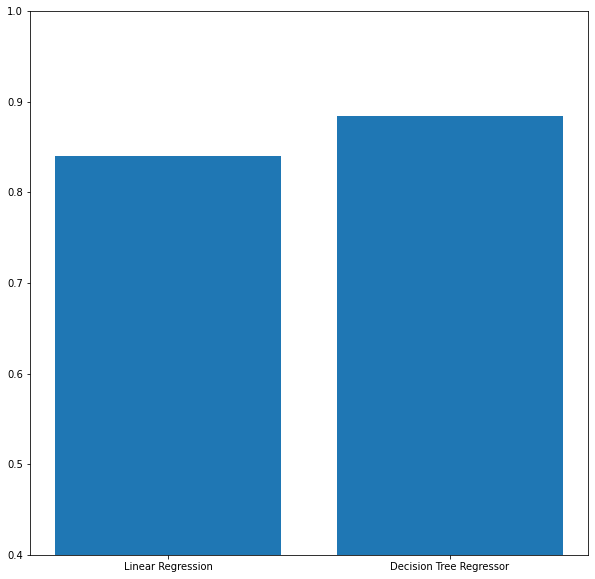

In [ ]:
models = ["Linear Regression", "Decision Tree Regressor"]
scores = [score2, score]
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(models,scores)
plt.ylim(ymin=0.4,ymax=1)
plt.show()






> Scatter Plot of Predictions and Actual values


The following graph plot the predictions from the model against the actual prices.
If the line is linear and slim then the model is performing the best.

**Decision Tree Regressor**

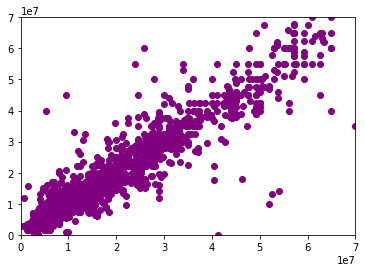

In [ ]:

plt.scatter(y_preds_tree, y_test, c ="purple")
# Limiting the scale and making it similar for x and y axes for better graphing.
plt.xlim(xmin=0,xmax=7e7)
plt.ylim(ymin=0,ymax=7e7)
plt.show()
         

**Linear Regression**

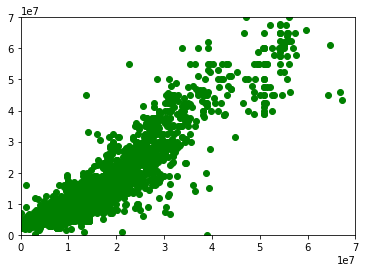

In [ ]:
plt.scatter(y_preds_linear, y_test, c ="green")
# Limiting the scale and making it similar for x and y axes for better graphing.
plt.xlim(xmin=0,xmax=7e7)
plt.ylim(ymin=0,ymax=7e7)
plt.show()

If we look closely we can see the graph of **Decision Tree** is narrower and follows are more linear trend compared to graph of **Linear Regression**